In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [10]:
method_rename_dict = {
        'velocyto': "Velocyto",
        'scvelo_dyn': "scVelo (dyn)",
        'scvelo_stc': "scVelo (stc)",
        'veloae': "VeloAE",
        'dynamo_m1': "Dynamo (m1)",
        'unitvelo_ind': "UniTVelo (ind)",
        'unitvelo_uni': "UniTVelo (uni)",
        'velovae_std': "VeloVAE (std)",
        'velovae_fullvb': "VeloVAE (Full VB)",
        'deepvelo': "DeepVelo",
        'celldancer': "cellDancer",
        'pyrovelocity_m1': "Pyro-Velocity (m1)",
        'pyrovelocity_m2': "Pyro-Velocity (m2)",
        'kvelo': "κ-velo",
        'velovi': "veloVI",
        'cell2fate': "cell2fate",
        'sdevelo': "SDEvelo",
        'svelvetvae': "SvelvetVAE",
        'latentvelo_std': "LatentVelo (std)",
        'tivelo_std': "TIVelo (std)",
        'tivelo_simple': "TIVelo (simple)",
        'sctour_mse': "scTour (MSE)",
        'sctour_nb': "scTour (NB)",
        'sctour_zinb': "scTour (ZINB)",
        'multivelo': "MultiVelo",
        'velvetvae': "VelvetVAE",
        'graphvelo_std': "GraphVelo (std)"}

In [11]:
method_colors = {
    'velocyto': "#6587AB",
    'scvelo_dyn': "#76B7B2",
    'scvelo_stc': "#92CB8A",
    'veloae': "#F6A24F",
    'dynamo_m1': "#FF9DA7",
    'unitvelo_ind': "#9C755F",
    'unitvelo_uni': "#DC6F71",
    'velovae_std': "#C6A11B",
    'velovae_fullvb': "#4F5CD5",
    'deepvelo': "#B07AA1",
    'celldancer': "#2E91E5",
    'pyrovelocity_m1': "#1EB754",
    'pyrovelocity_m2': "#FFBE7A",
    'kvelo': "#A05195",
    'velovi': "#B5BD61",
    'cell2fate': "#AD2513",
    'sdevelo': "#1F3E80",
    'svelvetvae': "#F6D55C",
    'latentvelo_std': "#6ACCBC",
    'tivelo_std': "#694D34",
    'tivelo_simple': "#F39B7F",
    'sctour_mse': "#8A89A6",
    'sctour_nb': "#A7D9D3",
    'sctour_zinb': "#F97F05",
    'graphvelo_std': "#0AC7DC"
}

In [12]:
datasets_direction = ["data02", "data03", "data05"]
datasets_time = ["data07", "data03", "data08"]

In [13]:
all_scores_direction = []
all_scores_time = []

for dataset in datasets_direction:
    df = pd.read_csv( Path(dataset) / f"cbdir_stability_df.csv")

    df["stability_score"] = df.iloc[:,1]
    df = df[["Method", "stability_score"]]
    df["dataset"] = dataset
    all_scores_direction.append(df)

concat_df_direction = pd.concat(all_scores_direction, ignore_index=True)

for dataset in datasets_time:
    df = pd.read_csv( Path(dataset) / f"spearman_stability_df.csv")
    df = df[df["Method"] != "svelvetvae_with_smooth"]

    df["stability_score"] = df.iloc[:,1]
    df = df[["Method", "stability_score"]]
    df["dataset"] = dataset
    all_scores_time.append(df)

concat_df_time = pd.concat(all_scores_time, ignore_index=True)

In [14]:
overall_mean_direction = (
    concat_df_direction.groupby("Method")["stability_score"]
    .mean()
    .reset_index()
    .rename(columns={"stability_score": "mean SSD"})
)

overall_mean_time = (
    concat_df_time.groupby("Method")["stability_score"]
    .mean()
    .reset_index()
    .rename(columns={"stability_score": "mean SST"})
)

concat_overall_mean = pd.merge(overall_mean_direction, overall_mean_time, on="Method")

In [15]:
concat_overall_mean

,Method,mean SSD,mean SST
0,cell2fate,0.520627,0.410880
1,celldancer,0.666275,0.681076
2,deepvelo,0.479446,0.696656
3,dynamo_m1,0.514843,0.332161
4,graphvelo_std,0.436959,0.279681
5,kvelo,0.505114,0.535145
6,latentvelo_std,0.548762,0.405857
7,pyrovelocity_m1,0.478854,0.515682
8,pyrovelocity_m2,0.595727,0.777976
9,sctour_mse,0.383276,0.269620


In [16]:
from scipy.stats import spearmanr
rho, pval = spearmanr(concat_overall_mean['mean SSD'], concat_overall_mean['mean SST'])
print(rho)
print(pval)

0.6415384615384615
0.0005475432065244732


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

def plot_overall_scatter(
    concat_overall_mean: pd.DataFrame,
    method_colors: dict,
    x_col: str = "mean SSD",
    y_col: str = "mean SST",
    figsize=(5, 4),
    point_size: int = 200,
    edge_color: str = "black",
    annotate: bool = False,
    show_legend: bool = True,
    xlim: tuple = None,
    ylim: tuple = None,
    x_ticks: list = None,
    y_ticks: list = None,
):
    """
    Scatter plot of overall mean metrics (mean SSD vs mean SST) for each method.

    Parameters:
    ----------
    annotate: bool
        If True, displays method names on the scatter plot.
    show_legend: bool
        If True, displays the legend on the right side of the plot.
    """
    concat_overall_mean["color"] = concat_overall_mean["Method"].map(method_colors)

    fig, ax = plt.subplots(figsize=figsize)
    scatter = ax.scatter(
        concat_overall_mean[x_col],
        concat_overall_mean[y_col],
        c=concat_overall_mean["color"],
        s=point_size,
        edgecolors=None,
        linewidths=0,
        alpha=1
    )

    # === Option to annotate method names ===
    if annotate:
        for _, row in concat_overall_mean.iterrows():
            ax.text(
                row[x_col],
                row[y_col],
                row["Method"],
                fontsize=9,
                ha="center",
                va="center",
                fontweight="medium",
                color="black",
                alpha=1
            )

    # === Option to add legend on the right side ===
    if show_legend:
        legend_elements = [
            Line2D([0], [0], marker='o', color='w',
                   label=method, markerfacecolor=color, markersize=8,
                   markeredgecolor=None, markeredgewidth=0)
            for method, color in method_colors.items()
            if method in concat_overall_mean["Method"].values
        ]
        ax.legend(
            handles=legend_elements,
            title="Methods",
            loc="center left",
            bbox_to_anchor=(1.05, 0.5),
            frameon=False,
            fontsize=9,
            title_fontsize=10,
            ncol=1
        )

    ax.set_xlabel("")
    ax.set_ylabel("")

    ax.tick_params(axis='both', length=5)

    for spine in ax.spines.values():
        spine.set_linewidth(1)
        spine.set_color("black")

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        # label.set_fontname('Arial')
        # label.set_fontweight('bold')
        label.set_fontsize(12)
    
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    
    if x_ticks is not None:
        ax.set_xticks(x_ticks)
    if y_ticks is not None:
        ax.set_yticks(y_ticks)

    return fig, ax

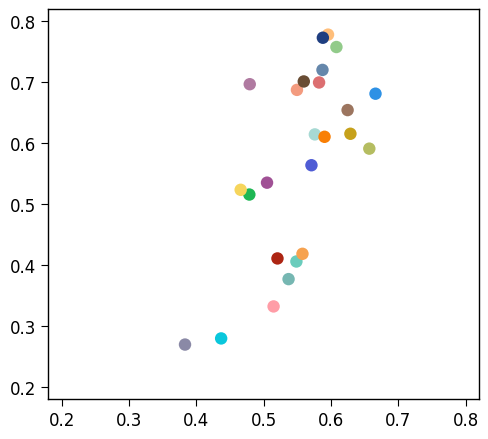

In [18]:
fig, ax = plot_overall_scatter(concat_overall_mean,
                     method_colors,
                     figsize=(5, 4.5),
                     point_size=80,
                     annotate=False,
                     show_legend=False,
                     xlim=(0.18, 0.82),
                     ylim=(0.18, 0.82))
plt.tight_layout()
plt.savefig("seq_depth_scatter.svg", format="svg", bbox_inches="tight", dpi=300)
plt.show()